### Documentation

#### Overview
The Notebook explores a non-linear system of equations using Python and the SymPy library. The code defines a system of difference equations, computes the eigenvalues of the system, and visualizes the results using Matplotlib.

#### Code Structure
The code is organized into several sections:

1. Importing Libraries: The code imports necessary libraries, including SymPy, NumPy, and Matplotlib.
2. Defining the System: The code defines a system of difference equations using SymPy.
3. Computing Eigenvalues: The code computes the eigenvalues of the system using SymPy and NumPy.
4. Visualizing the Results: The code visualizes the results using Matplotlib.

#### Key Functions and Variables
1. system function: Defines a system of difference equations using SymPy.
2. matrix variable: Represents the Jacobian matrix of the system.
3. eigenvalues_sympy variable: Represents the eigenvalues of the system computed using SymPy.
4. eigenvalues_numpy variable: Represents the eigenvalues of the system computed using NumPy.

### 1. Non-linear Systems

In [2]:
import sympy as sp
import numpy as np 
import pandas as pd
from IPython.display import display_latex as disp


In [3]:
x_t, x_prev, y_t, y_prev = sp.symbols('x_t x_prev y_t y_prev')


In [4]:
def system(x_0, y_0, t):
    x_prev = x_0
    y_prev = y_0
    x, y = [], []
    x.append(x_prev)
    y.append(y_prev)
    
    for _ in range(20):
        
        x_new = x_prev + 0.1 * (x_prev - x_prev * y_prev) 
        y_new = y_prev + 0.1 * (y_prev - x_prev * y_prev) 
        x.append(x_new)
        y.append(y_new)
        
        x_prev, y_prev = x_new, y_new
        
    return np.array(x), np.array(y)

In [5]:
import matplotlib.pyplot as plt

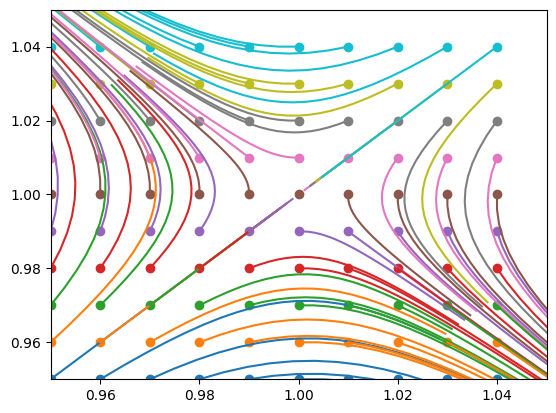

In [6]:
for x_0 in range(10):
    for y_0 in range(10):
        #print(x_0, y_0)
        run_x, run_y= system(0.95+x_0/100, 0.95+y_0/100, 0)
        #print(run_x[:5])
        #print(run_y[:5])
        plt.plot(run_x, run_y)
        plt.scatter(run_x[0], run_y[0])

plt.xlim(0.95, 1.05)
plt.ylim(0.95, 1.05)
plt.show()

C:\Users\TRISHA\AppData\Local\Temp\ipykernel_37564\984692231.py:15: RuntimeWarning: invalid value encountered in divide
  U_normalized = U / np.hypot(U, V)  # Normalize U components
C:\Users\TRISHA\AppData\Local\Temp\ipykernel_37564\984692231.py:16: RuntimeWarning: invalid value encountered in divide
  V_normalized = V / np.hypot(U, V)  # Normalize V components


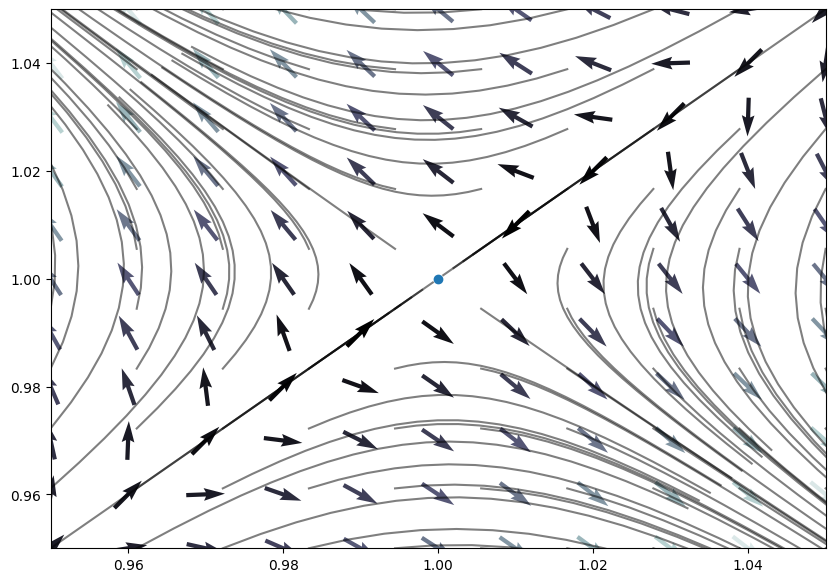

In [23]:
X, Y = np.mgrid[0.95:1.05:0.01, 0.95:1.05:0.01]  # Create grid of initial conditions
U = np.zeros(X.shape)  # Initialize U and V arrays for the direction vectors
V = np.zeros(Y.shape)

# Calculate the derivatives (dx/dt, dy/dt) at each point in the grid
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        run_x, run_y = system(X[i, j], Y[i, j], 0)
        U[i, j] = run_x[-1] - run_x[0]  # Change in x position
        V[i, j] = run_y[-1] - run_y[0]  # Change in y position

# Plot the vector field using quiver
fig, ax = plt.subplots(figsize=(10, 7))
M = np.hypot(U, V)  # Calculate magnitude of vectors for color mapping
U_normalized = U / np.hypot(U, V)  # Normalize U components
V_normalized = V / np.hypot(U, V)  # Normalize V components
ax.quiver(X, Y, U_normalized, V_normalized, M, scale=20, pivot='mid', cmap=plt.cm.bone)


# Add streamlines or trajectories if desired
for x_0 in np.linspace(0.95, 1.05, 10):
    for y_0 in np.linspace(0.95, 1.05, 10):
        run_x, run_y = system(x_0, y_0, 0)
        ax.plot(run_x, run_y, color='black', alpha=0.5)  # Plot the trajectory

sol = [1, 1]
plt.scatter(sol[0], sol[1])
plt.xlim(0.95, 1.05)
plt.ylim(0.95, 1.05)
plt.show()

In [9]:
# t = sym.symbols('t')
# x = sym.Function('x')

x_t, x_prev, y_t, y_prev = sp.symbols('x_t x_prev y_t y_prev')
t = sp.Symbol('t')

# Define the nonlinear difference equations
x_eq = x_prev + 0.1 * (x_prev - x_prev * y_prev) - x_t
y_eq = y_prev + 0.1 * (y_prev - x_prev * y_prev) - y_t

In [10]:
matrix = [[x_eq.diff(x_prev), x_eq.diff(y_prev)], [y_eq.diff(x_prev), y_eq.diff(y_prev)]]

In [11]:
# Define the variables
x_prev, y_prev = sp.symbols('x_prev y_prev')

# Define the functions x_eq and y_eq (just as placeholders)
x_eq = x_prev + 0.1 * (x_prev - x_prev * y_prev) - x_t
y_eq = y_prev + 0.1 * (y_prev - x_prev * y_prev) - y_t

# Define the matrix with derivatives
matrix = sp.Matrix([[x_eq.diff(x_prev), x_eq.diff(y_prev)],
                    [y_eq.diff(x_prev), y_eq.diff(y_prev)]])


In [33]:
from sympy import symbols, Eq, solve

x_prev, y_prev = symbols('x_prev y_prev')

# Define the equations
eq1 = 1.1 - 0.1*y_prev - 0.1*x_prev
eq2 = -0.1*y_prev + 1.1 - 0.1*x_prev

# Solve the system of equations
solution = solve((eq1, eq2), (y_prev, x_prev))

print(solution)

{y_prev: 11.0 - x_prev}


In [12]:
print("Symbolic Matrix:")
sp.pprint(matrix)

Symbolic Matrix:
⎡1.1 - 0.1⋅yₚᵣₑᵥ    -0.1⋅xₚᵣₑᵥ   ⎤
⎢                                ⎥
⎣  -0.1⋅yₚᵣₑᵥ     1.1 - 0.1⋅xₚᵣₑᵥ⎦


In [13]:
matrix.eigenvals()

{-0.1*x_prev - 0.1*y_prev + 1.1: 1, 1.10000000000000: 1}

In [14]:
eigenvalues_sympy = matrix.eigenvals()
print("\nEigenvalues (SymPy):")
for eigenval in eigenvalues_sympy:
    print(eigenval)

# Now let's use NumPy to compute eigenvalues numerically
# First, we need to substitute specific values for x_eq and y_eq
# For this example, we can assume specific derivatives; replace with actual derivatives as necessary
# Example: Assume x_eq = x_prev and y_eq = y_prev (this should be replaced with actual equations)
x_eq = x_prev
y_eq = y_prev

# Define the matrix with numerical values
numerical_matrix = np.array([[sp.lambdify((x_prev, y_prev), matrix[0, 0])(1, 1), 
                               sp.lambdify((x_prev, y_prev), matrix[0, 1])(1, 1)],
                              [sp.lambdify((x_prev, y_prev), matrix[1, 0])(1, 1), 
                               sp.lambdify((x_prev, y_prev), matrix[1, 1])(1, 1)]])

# Calculate eigenvalues using NumPy
eigenvalues_numpy, _ = np.linalg.eig(numerical_matrix)
print("\nEigenvalues (NumPy):")
print(eigenvalues_numpy)


Eigenvalues (SymPy):
-0.1*x_prev - 0.1*y_prev + 1.1
1.10000000000000

Eigenvalues (NumPy):
[1.1 0.9]


In [ ]:
fixed_point = 